In [30]:
# 1 Загрузите файл HR.csv в pandas dataframe 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()
# Ниже получили расчёт среднего, мин/макс значений, среднее отклонение

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# 2 Рассчитаем медиану
df.median()

/var/folders/gb/n80j_2590pz6sfm9bj35v4th0000gn/T/ipykernel_21055/2892993198.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [8]:
# 2 Рассчитаем моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


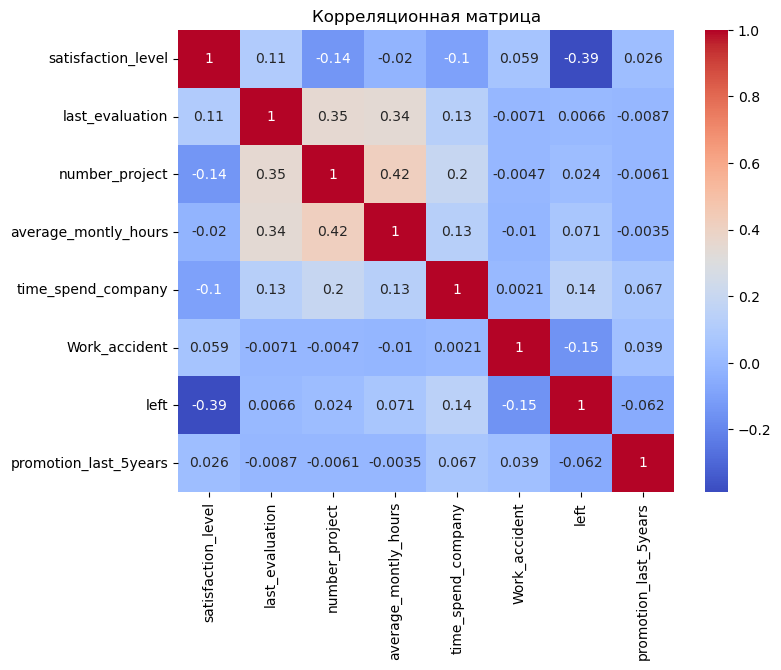

In [26]:
# 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Ответ: 
# 2 самые скоррелированные переменные: average_montly_hours и number_project (0.42)
# 2 наименее скоррелированные переменные: time_spend_company и Work_accident (0.0021)

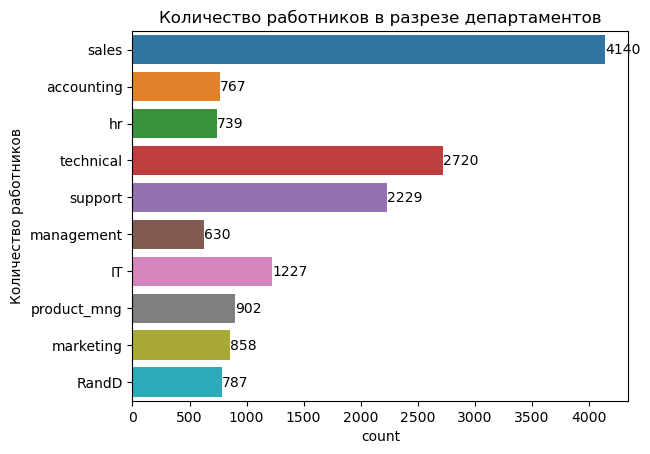

In [11]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте
ax = sns.countplot(data=df, y="department")
ax.bar_label(ax.containers[0])
plt.title("Количество работников в разрезе департаментов")
plt.ylabel("Количество работников")
plt.show()

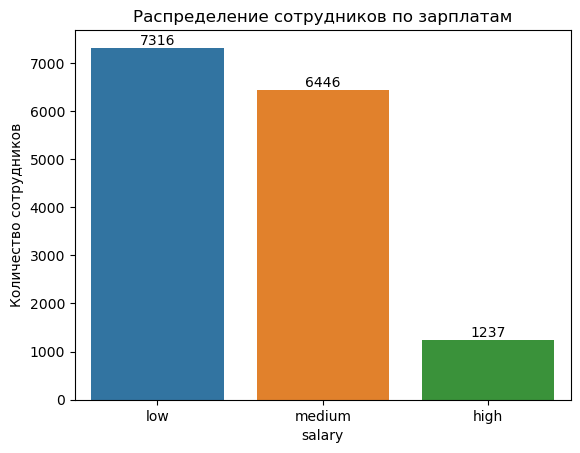

In [14]:
# 5 Показать распределение сотрудников по зарплатам.
ax = sns.countplot(data=df, x="salary")
ax.bar_label(ax.containers[0])
plt.title("Распределение сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


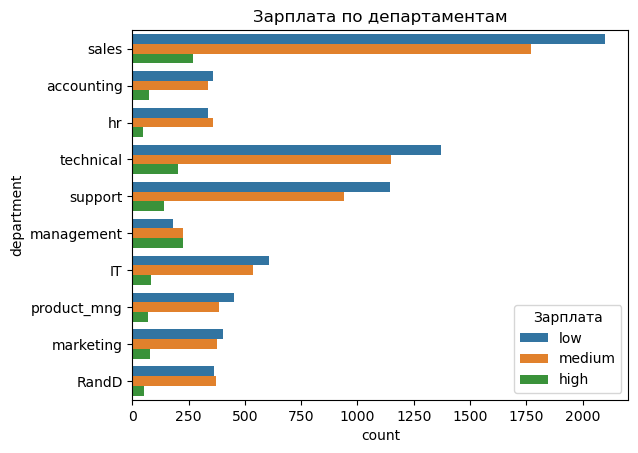

In [23]:
# 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
display(df.groupby('department')['salary'].value_counts().unstack())

sns.countplot(y='department', hue='salary', data=df, order=None)
plt.title('Зарплата по департаментам')
plt.legend(loc='best', title='Зарплата')
plt.show()

In [29]:
# 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, различие статистически значимо: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")
else:
    print("Не отклоняем нулевую гипотезу, различие не статистически значимо: нет оснований полагать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")

Не отклоняем нулевую гипотезу, различие не статистически значимо: нет оснований полагать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [24]:
# 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов
df.groupby('left').agg({
    'promotion_last_5years': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
})

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


In [31]:
# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник 
# на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

# Делим на признаки и целевую переменную
x = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# Делим на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Обучение модели LDA
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7533333333333333
